In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin

## Two Spin

In [2]:
N=2

In [3]:
Wave=np.zeros(2**N)

In [4]:
Index={}
for i in range(N):
    for j in range(2):
        Index[(i,j)]=2*i+j

In [5]:
Index

{(0, 0): 0, (0, 1): 1, (1, 0): 2, (1, 1): 3}

In [6]:
Sx=np.array([[0,1], [1,0]])/2.0
Sy=np.array([[0, -1j], [1j,0]])/2.0
Sz=np.array([[1,0],[0,-1]])/2.0
II=np.array([[1,0],[0,1]])
SList=[Sx, Sy, Sz]

In [7]:
np.dot(Sx, Sx)+np.dot(Sy, Sy)+np.dot(Sz,Sz)

array([[0.75+0.j, 0.  +0.j],
       [0.  +0.j, 0.75+0.j]])

In [8]:
def Couple(A, B):
    #print A[0].shape
    N=2*(A[0].shape[0])
    #print N
    H=np.zeros([N, N])+0j
    for i in range(len(A)):
        H+=np.dot(np.kron(A[i], II), np.kron(II, B[i]))
    return H

In [9]:
def Hamiltonian(J):
    return J*Couple(SList, SList)

In [10]:
J=1.0 #simple example
H2=Hamiltonian(J) 

In [11]:
lin.eigh(H2)

(array([-0.75,  0.25,  0.25,  0.25]),
 array([[ 0.        +0.j,  1.        +0.j,  0.        +0.j,
          0.        +0.j],
        [ 0.70710678+0.j,  0.        +0.j,  0.70710678+0.j,
          0.        +0.j],
        [-0.70710678+0.j,  0.        +0.j,  0.70710678+0.j,
          0.        +0.j],
        [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
          1.        +0.j]]))

### Four energy scale: -3J/4 and three J/4

## Four Spins

In [45]:
def Spin(A, n, tot):
    Total=[]
    for m in range(len(A)):
        S=1.0
        for i in range(tot):
            if i==n:
                S=np.kron(S, A[m])
            else:
                S=np.kron(S, II)
        #print S.shape
        Total.append(S)
    #print Total
    return Total

In [46]:
def Coup(A, B):
    #print A[0].shape
    N=A[0].shape[0]
    #print N
    H=np.zeros([N, N])+0j
    for i in range(len(A)):
        H+=np.dot(A[i], B[i])
    return H

In [66]:
def J1J2(J1, J2):
    H01=Coup(Spin(SList, 0, 4), Spin(SList, 1, 4))
    H23=Coup(Spin(SList, 2, 4), Spin(SList, 3, 4))
    H02=Coup(Spin(SList, 0, 4), Spin(SList, 2, 4))
    H13=Coup(Spin(SList, 1, 4), Spin(SList, 3, 4))
    return J2*(H01+H23)+J1*(H02+H13)

In [67]:
E, _=lin.eigh(J1J2(1.0,1.0))
print E

[-2.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -2.25514052e-17  0.00000000e+00  6.20960976e-17  8.42732175e-17
  1.05304985e-16  2.23086064e-16  4.49946523e-16  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]


In [106]:
Curves={}
x=np.array(range(20))*0.1
for i in range(20):
    J2=i*0.1
    E, _=lin.eigh(J1J2(1.0, J2))
    #print len(E)
    for e in range(len(E)):
        if Curves.has_key(e):
            Curves[e].append(E[e]/4.0)
        else:
            Curves[e]=[E[e]/4.0]

In [107]:
Curves[0]

[-0.37500000000000006,
 -0.3759848003542363,
 -0.3791287847477922,
 -0.3847048604328896,
 -0.39294494717703377,
 -0.4040063509461097,
 -0.41794494717703345,
 -0.43470486043288953,
 -0.4541287847477921,
 -0.4759848003542364,
 -0.5000000000000002,
 -0.5258913438213184,
 -0.5533882181415011,
 -0.5822456530637901,
 -0.61224989991992,
 -0.6432189138830738,
 -0.675,
 -0.7074662146737186,
 -0.7405124837953326,
 -0.7740519408288585]

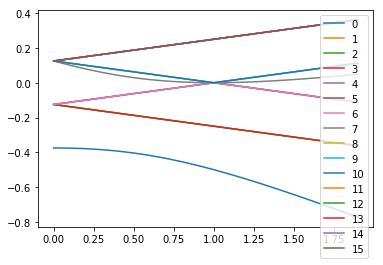

In [108]:
for e in range(len(Curves)):
    plt.plot(x, Curves[e], label=e)

plt.legend()
plt.show()

In [71]:
E, _=lin.eigh(Coup(Spin(SList, 0, 2), Spin(SList, 1, 2)))
print E
print Coup(Spin(SList, 0, 2), Spin(SList, 1, 2))
print Couple(SList, SList)
print Spin(SList, 0, 2)[0]
print np.kron(Sx, II)

[-0.75  0.25  0.25  0.25]
[[ 0.25+0.j  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j -0.25+0.j  0.5 +0.j  0.  +0.j]
 [ 0.  +0.j  0.5 +0.j -0.25+0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.25+0.j]]
[[ 0.25+0.j  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j -0.25+0.j  0.5 +0.j  0.  +0.j]
 [ 0.  +0.j  0.5 +0.j -0.25+0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.25+0.j]]
[[0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]
 [0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]]
[[0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]
 [0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]]


In [53]:
E, _=lin.eigh(Coup(Spin(SList, 1, 4), Spin(SList, 2, 4)))
print E

[-0.75 -0.75 -0.75 -0.75  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25]


In [54]:
E, _=lin.eigh(Coup(Spin(SList, 1, 4), Spin(SList, 3, 4))+Coup(Spin(SList, 0, 4), Spin(SList, 2, 4)))
print E

[-1.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
  0.5  0.5]


In [109]:
E, _=lin.eigh(J1J2(1.0, 1.0))
print E/4.0

[-5.00000000e-01 -2.50000000e-01 -2.50000000e-01 -2.50000000e-01
 -5.63785130e-18  0.00000000e+00  1.55240244e-17  2.10683044e-17
  2.63262462e-17  5.57715160e-17  1.12486631e-16  2.50000000e-01
  2.50000000e-01  2.50000000e-01  2.50000000e-01  2.50000000e-01]


# Six Spins

In [115]:
def J1J2_3(J1, J2):
    H01=Coup(Spin(SList, 0, 6), Spin(SList, 1, 6))
    H23=Coup(Spin(SList, 2, 6), Spin(SList, 3, 6))
    H45=Coup(Spin(SList, 4, 6), Spin(SList, 5, 6))
    
    H02=Coup(Spin(SList, 0, 6), Spin(SList, 2, 6))
    H13=Coup(Spin(SList, 1, 6), Spin(SList, 3, 6))
    
    H24=Coup(Spin(SList, 2, 6), Spin(SList, 4, 6))
    H35=Coup(Spin(SList, 3, 6), Spin(SList, 5, 6))
    
    #periodic condition
    #H04=Coup(Spin(SList, 0, 6), Spin(SList, 4, 6))
    #H15=Coup(Spin(SList, 1, 6), Spin(SList, 5, 6))
    #return J2*(H01+H23+H45)+J1*(H02+H13+H24+H35+H04+H15)
    
    #non periodic condition
    return J2*(H01+H23+H45)+J1*(H02+H13+H24+H35)

In [116]:
Curves={}

for i in range(20):
    J2=i*0.1
    E, _=lin.eigh(J1J2_3(J2, 1.0))
    #print len(E)
    for e in range(len(E)):
        if Curves.has_key(e):
            Curves[e].append(E[e]/6.0)
        else:
            Curves[e]=[E[e]/6.0]

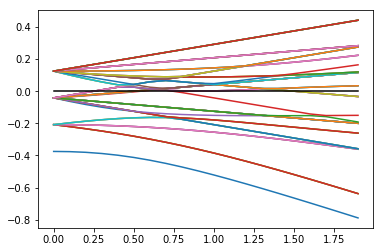

In [117]:
x=np.array(range(20))*0.1
for e in range(len(Curves)):
    plt.plot(x, Curves[e], label=e)

x=np.linspace(0.0,1.9,num=100)
y=x*0.0
#print x
#print y
plt.plot(x,y,'k-')
#plt.legend()
plt.show()

In [118]:
E, _=lin.eigh(J1J2_3(1.0, 1.0))
print E/6.0

[-0.52156421 -0.38503254 -0.38503254 -0.38503254 -0.2551294  -0.2551294
 -0.2551294  -0.20833333 -0.20833333 -0.20833333 -0.20833333 -0.17898993
 -0.17898993 -0.17898993 -0.15045061 -0.125      -0.125      -0.125
 -0.125      -0.125      -0.125      -0.125      -0.125      -0.04166667
  0.00210774  0.00210774  0.00210774  0.04166667  0.04166667  0.04166667
  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667  0.04166667
  0.04166667  0.04166667  0.04166667  0.04166667  0.04701481  0.08846273
  0.08846273  0.08846273  0.125       0.125       0.125       0.125
  0.125       0.14524806  0.14524806  0.14524806  0.20833333  0.20833333
  0.20833333  0.20833333  0.20833333  0.29166667  0.29166667  0.29166667
  0.29166667  0.29166667  0.29166667  0.29166667]
